# Exploratory Data Analysis

This notebook covers the efforts to load, review and analyze dataset to see data types, missing data, and usefulness of columns.

## Imports
First, lets get all we need imported and configured.

In [89]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.rc("font", size=14)

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

## Data
These section loads specific data and defines basic attributes.

### Data Columns
Column names are set based on data dictionary provided including column type and category.

In [91]:
cols = [
    ('Id', 'Id', 'Numeric'), 
    ('addr_state', 'Customer', 'Categorical'), 
    ('annual_inc', 'Customer', 'Numeric'), 
    ('collections_12_mths_ex_med', 'Customer', 'Numeric'), 
    ('delinq_2yrs', 'Customer', 'Numeric'), 
    ('emp_length', 'Customer', 'Numeric'), 
    ('home_ownership', 'Customer', 'Categorical'), 
    ('inq_last_6mths', 'Customer', 'Numeric'), 
    ('mths_since_last_delinq', 'Customer', 'Numeric'), 
    ('mths_since_last_major_derog', 'Customer', 'Numeric'), 
    ('mths_since_last_record', 'Customer', 'Numeric'), 
    ('open_acc', 'Customer', 'Numeric'), 
    ('pub_rec', 'Customer', 'Numeric'), 
    ('pymnt_plan', 'Customer', 'Categorical'), 
    ('revol_bal', 'Customer', 'Numeric'), 
    ('revol_util', 'Customer', 'Numeric'), 
    ('total_acc', 'Customer', 'Numeric'), 
    ('zip_code', 'Customer', 'Categorical'), 
    ('debt_to_income', 'Loan', 'Numeric'), 
    ('initial_list_status', 'Loan', 'Categorical'), 
    ('policy_code', 'Loan', 'Categorical'), 
    ('purpose_cat', 'Loan', 'Categorical'), 
    ('verification_status', 'Loan', 'Categorical'), 
    ('is_bad', 'Target', 'Numeric')]

cols=pd.DataFrame(data=cols, columns=["Name","Category","Type"])

#Create list of cols for subgroups
cols_customer = cols[cols["Category"]=="Customer"]["Name"].values
cols_loan = cols[cols["Category"]=="Loan"]["Name"].values
cols_categorical = cols[cols["Type"]=="Categorical"]["Name"].values
cols_numeric = cols[cols["Type"]=="Numeric"]["Name"].values

cols_y=["is_bad"]
cols_id=['Id']
cols_numeric = [e for e in cols_numeric if e not in cols_id+cols_y]


# Print out list of columns for each subgroup
print("\n *** Customer: \n",cols_customer)
print("\n *** Loan: \n",cols_loan)
print("\n *** Categorical: \n",cols_categorical,"\n")
print("\n *** Numerical: \n",cols_numeric)
len(cols_numeric)


 *** Customer: 
 ['addr_state' 'annual_inc' 'collections_12_mths_ex_med' 'delinq_2yrs'
 'emp_length' 'home_ownership' 'inq_last_6mths' 'mths_since_last_delinq'
 'mths_since_last_major_derog' 'mths_since_last_record' 'open_acc'
 'pub_rec' 'pymnt_plan' 'revol_bal' 'revol_util' 'total_acc' 'zip_code']

 *** Loan: 
 ['debt_to_income' 'initial_list_status' 'policy_code' 'purpose_cat'
 'verification_status']

 *** Categorical: 
 ['addr_state' 'home_ownership' 'pymnt_plan' 'zip_code'
 'initial_list_status' 'policy_code' 'purpose_cat' 'verification_status'] 


 *** Numerical: 
 ['annual_inc', 'collections_12_mths_ex_med', 'delinq_2yrs', 'emp_length', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_major_derog', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'debt_to_income']


14

### Load Data and Columns
Note that after initial review of data it was noticed there were two entries of `na` and `NONE` in columns to mark it as missing. These values are marked as N/A or missing during the loading of data.

In [206]:
# Load Data
df = pd.read_csv('DR_Demo_Lending_Club_reduced.csv', index_col=0, na_values=['na', 'nan', 'none','NA', 'NAN','NONE'])

# Get all columns from dataset itself
cols_df = list(df.columns.values)
cols_X = cols_df.copy()
# Remove output columns
for h in cols_y+cols_id:
    try:
        cols_X.remove(h)
    except:
        pass

    
df_type = pd.DataFrame(data=[df.dtypes,df.count()],index=["Dtype","Count"])

# Verify Number of Columns
print("Data  Id        : %i" %len(cols_id))  
print("Data  Columns   : %i" %len(cols_df)) 
print("Data  Columns X : %i" %len(cols_X)) 
print("Data  Columns y : %i" %(len(cols_df)-len(cols_X)))
   
print("\nBreakout of X Columns by Groups:\n")
print("%5sCustomer  , Loan       : %i, %i" %("",len(cols_customer),len(cols_loan)))
print("%5sNumerical , Categorical: %i, %i" %("",len(cols_numeric),len(cols_categorical)))



print("\nType/Count of Data Columns:")    
df_type

Data  Id        : 1
Data  Columns   : 23
Data  Columns X : 22
Data  Columns y : 1

Breakout of X Columns by Groups:

     Customer  , Loan       : 17, 5
     Numerical , Categorical: 14, 8

Type/Count of Data Columns:


,is_bad,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose_cat,zip_code,addr_state,debt_to_income,...,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code
Dtype,int64,float64,object,float64,object,object,object,object,object,float64,...,float64,float64,float64,int64,float64,float64,object,float64,int64,object
Count,10000,9750,9999,9999,10000,10000,10000,10000,10000,10000,...,840,9995,9995,10000,9974,9995,10000,9968,10000,10000


#### Review Columns (Missing Data, Errors, ...)
We will look at each column and find out number of unique values, total given values (non-missing) and also list the unique values of each column. This can be done visual using the spreadsheet as well. 

To keep it easy to read, we will look into more details for columns of categorical nature or columns with smaller distinct values.

In [210]:
# For given column a block is printed to provide number of unique values, 
# number of all values compared to size of dataset, and also a breakdown of output vs distinct values 
# of column if there are less than a threshold. therwise it will print a subsample of values.

def probe_column(df, n, cols_y=cols_y, max_details=30, max_printed_values=50):
    print(75*'-')
    print("***** {0:<20s} [u={1:4d}, n={2:5d}/{3:d}]:".format(n,
                                                            len(df[n].unique()), 
                                                            df[n].count(), 
                                                            df.shape[0]) )
    

    if len(df[n].unique())<max_details:       #.dropna()
        if n not in cols_y:
            print("\n",df.groupby(n).count()[cols_y])   
        else:
            print("\n",df.groupby(n).size())   
    else:
        print("\n",df[n].unique()[:max_printed_values])  #.dropna()
        
        
# Visit each column and identify basic stats on distinct values, and missing data
# Categorical data might need to be visited in more detail for potential dictation typos 
# and values that dont make any sense.
for n in cols_categorical:
    probe_column(df, n)
        
for n in cols_numeric + cols_y:
    probe_column(df, n)
                                                                


---------------------------------------------------------------------------
***** addr_state           [u=  50, n=10000/10000]:

 ['TX' 'KS' 'CA' 'NY' 'OH' 'DC' 'NV' 'IL' 'WA' 'DE' 'FL' 'NJ' 'OK' 'VA'
 'NH' 'MA' 'NC' 'OR' 'GA' 'CO' 'MD' 'CT' 'MO' 'WI' 'AZ' 'SC' 'MN' 'MI'
 'PA' 'AK' 'AR' 'LA' 'HI' 'WV' 'KY' 'RI' 'AL' 'SD' 'NM' 'ID' 'UT' 'MT'
 'WY' 'VT' 'TN' 'IA' 'MS' 'NE' 'IN' 'ME']
---------------------------------------------------------------------------
***** home_ownership       [u=   5, n= 9999/10000]:

                 is_bad
home_ownership        
MORTGAGE          4445
OTHER               34
OWN                775
RENT              4745
---------------------------------------------------------------------------
***** pymnt_plan           [u=   2, n=10000/10000]:

             is_bad
pymnt_plan        
n             9998
y                2
---------------------------------------------------------------------------
***** zip_code             [u= 720, n=10000/10000]:

 ['766xx' '6

We can make following observations about columns:

- `home_ownership` had only 1 value of `NONE` which was marked as N/A value, probably we can correct that to `Other`. 

- `pymnt_plan` is dominated by `n` values (9998 to 2). It might be needed to exclude this column from attributes.

- `initial_list_status` is dominantly `f` (9983 to 17). It might be needed to exclude this column from attributes.

- `purpose_cat` might be needing some cleaning as there are entires with redundant `small business` (e.g. 'small business small business') at the end which are not a lot in records.

- `collections_12_mths_ex_med` has only a static 0 value so might not be relevent or helpful to modeling.

- `pub_rec` has little records of value `3.0` but since it's multi-valued and is expected to have 1 or max 2 public record judgement agains applicant in most cases, there seem to be no issue with this column.

- `mths_since_last_delinq` and `mths_since_last_record` have 3684 and 840 values which are quite low compared to all of 10,000 records. We might have to drop them due to large number of missing values.

- All other categorical columns do not show any sign of error or large missing data.
- All other numeric  columns do not show any sign of error or large missing data.

- `is_bad` target is biased with more 0 values which is expected as most loan institues practice safe loaning and the numbers are in favor of good applicants. However, this is something to note in cross-validation, modeling, and model evaluation efforts.

### Plotting Categorical Data
Defining functions required for categorical and numeric data processing to have a deeper look at distributions.

In [126]:
def plot_categorical(df, cols_X, cols_y=None, file_prefix="", rotation=45):
    if len(file_prefix)>0:
        file_prefix += "_" 
    nsub = 1 if cols_y is None else 2
    fig, axes = plt.subplots(1, nsub, figsize=(15,nsub*6))
    ax0 = axes if nsub == 1 else axes[0]
    g1 = sns.countplot(x=cols_X, data=df, ax=ax0) #, palette="ch:.25")
    g1.set_xticklabels(g1.get_xticklabels(), rotation = rotation)
    #plt.xticks(rotation=45)
    if cols_y is not None:
        g2 = sns.countplot(x=cols_X, hue=cols_y, data=df, ax=axes[1])
        g2.set_xticklabels(g2.get_xticklabels(), rotation = rotation)
        #plt.xticks(rotation=45)
    plt.savefig("./figs/%scatg_%s.png" %(file_prefix, n))
    plt.show()

    
def plot_numeric(df, cols_X, cols_y):
    #fig, axes = plt.subplots(1, 1, figsize=(15,6))
    sns.jointplot(x=cols_X, y=cols_y, data=df) #, ax=fig)        
    plt.set_xticklabels(rotation=30)
    plt.show()

It was noticed that `purpose_cat` might be needing some cleaning as there are entires with redundant `small business` (e.g. 'small business small business') at the end. We can first make count plots to verify this and if needed clean up these name. 
We revisit categorical data and see distribution of data over different values

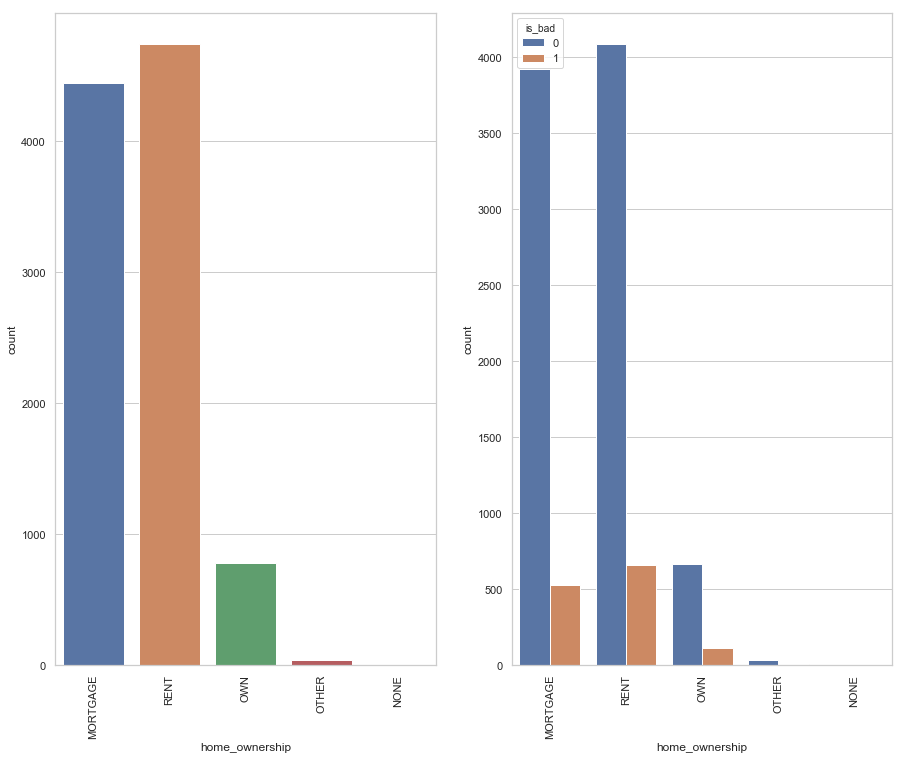

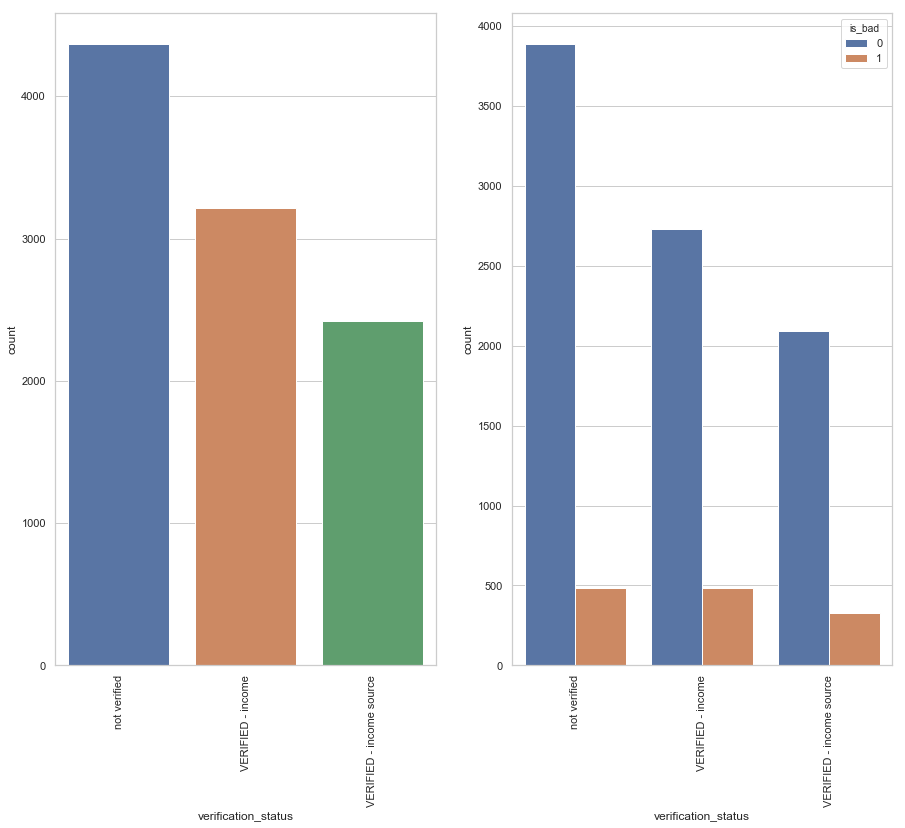

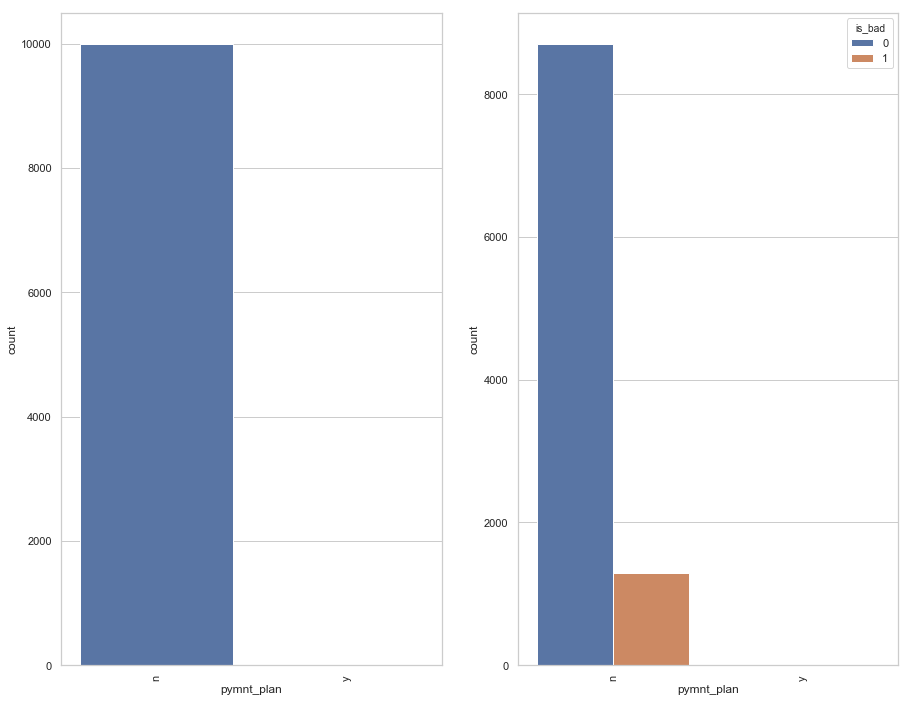

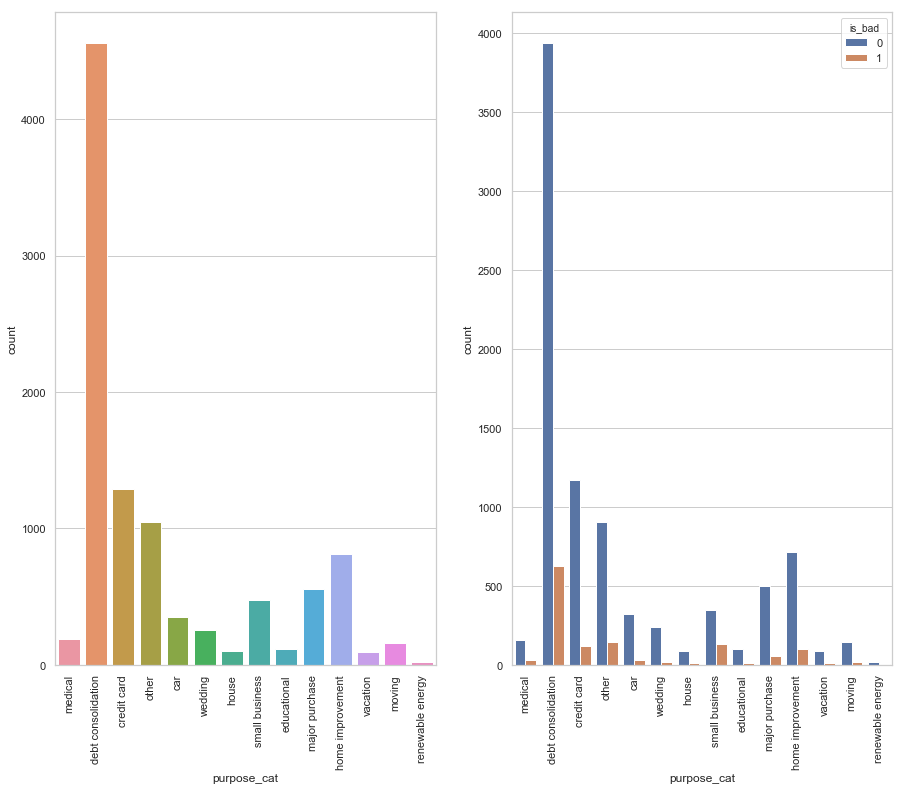

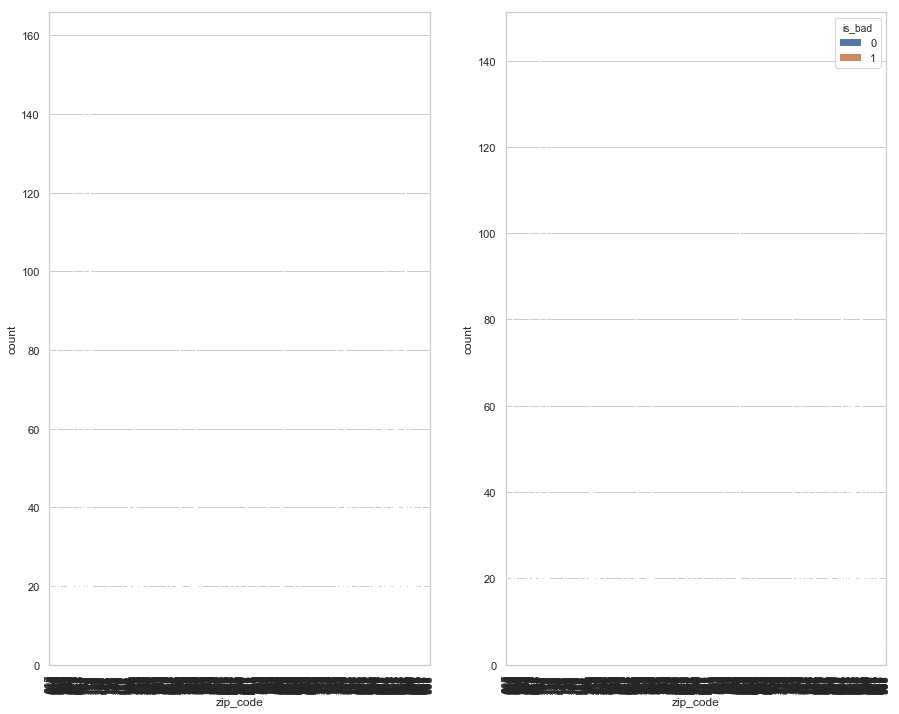

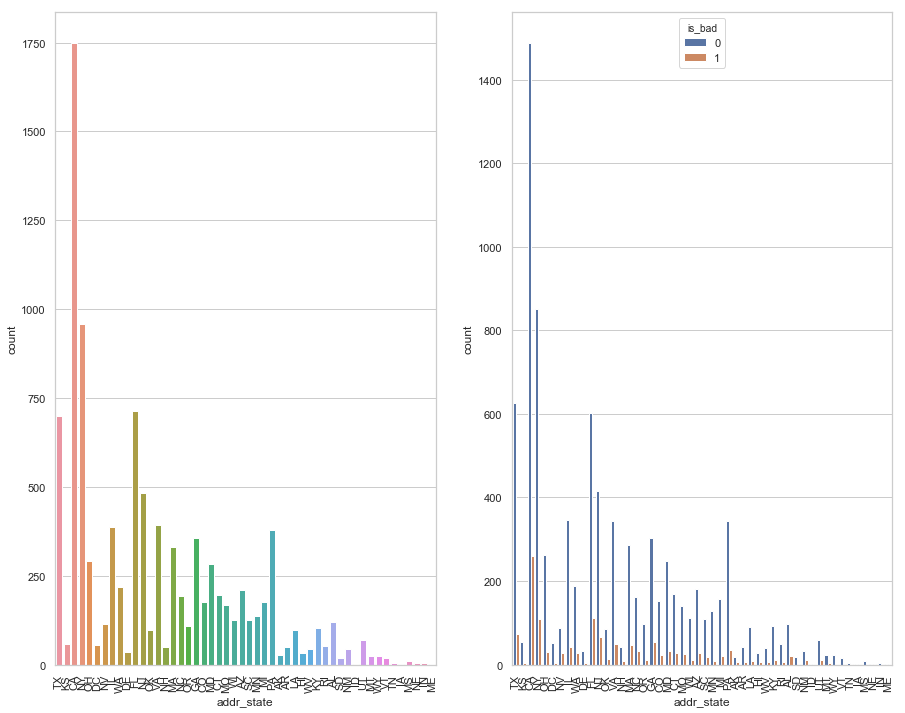

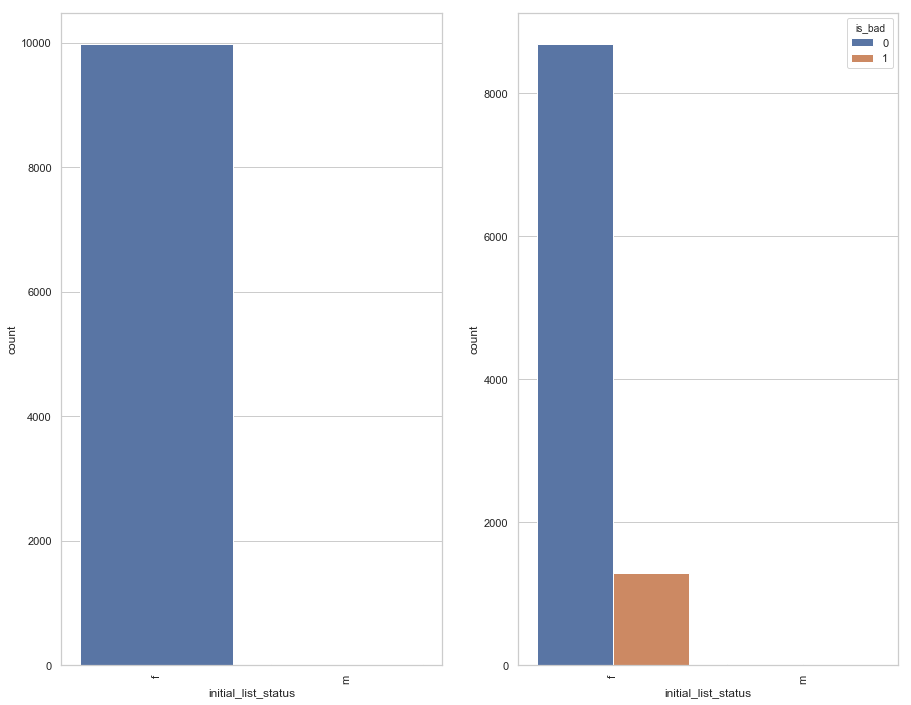

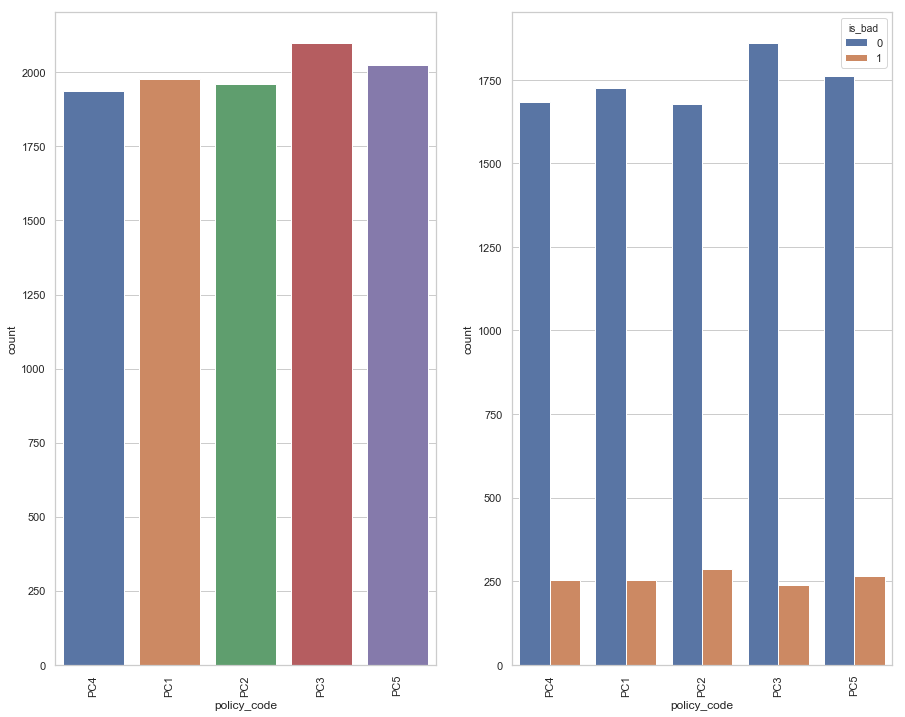

In [127]:
for n in df.columns.values:
    if n in cols_categorical:
        plot_categorical(df, n, cols_y=cols_y[0], file_prefix="raw", rotation=90)
        pass
    
    elif n in cols_numeric:
        try:
            #plot_numeric(df.dropna(), n, cols_y=cols_y[0])
            pass
        except:
            pass


We can make following observations about categorical columns:
- `home_owenership` has acceptable distributon and no obvious error is visible maybe except `None` values.
 
- `verification_status` has acceptable distributon and no obvious error is visible.

- `pymnt_plan`  is dominantly `n`. 

- `initial_list_status` is dominantly `f`.

- `purpose_cat` values with repeating `small business` at end seems to be error in data which needs cleaning up.

- `policy_code` is relatively uniform in distribution.

- `addr_state`  has relatively reasonable distribution over 50 states.

- `zip_code`    has relatively distributed values over all 720 values.

### Utility Functions
The statistical and visual inspection of categorical columns suggests the our initial suspection of repeating `small business` in `purpose_cat` column is most probably due to error. So, we will define functions to take care of that. 

Additionally, while we have both `zip_code` and `addr_state` provide similar location info, the break down of zip codes might be more detailed and useful. There are about 720 distinct values of zip codes  provided as `123XXX`, there might be risky to just clean up and convert these to numbers as it might deliver wrong signal to model. However, converting these to categories, will also add a large number of columns and also leave us prone to trouble with new zip codes not present in this data. 


Defining functions required for data processing.

In [128]:
import re
def trim_purpose(s):
    id_smallbiz = r'(.+?)\s*(?=small\s*business)'
    re_smallbiz = re.compile(id_smallbiz, re.I)

    mymatch = re.search(re_smallbiz,s)

    if mymatch != None:
        return mymatch.group(1)
    else:
        return s
             
def trim_zipcode(s):
    id_zip = r'^(\d{3})(x{2})$'
    re_zip = re.compile(id_zip, re.I)

    mymatch = re.search(re_zip,s)

    if mymatch != None:
        return mymatch.group(1)
    else:
        return s
    
def create_dummy(df, colscategorical):
    for n in colscategorical:
        #cat_list='var_%s' %n
        dummy_list = pd.get_dummies(df[n], prefix=n)
        df=df.join(dummy_list)

    colsdf=df.columns.values.tolist()
    colskeep=[h for h in colsdf if h not in colscategorical]
    # New Dataset, Headers to Keep, Headers to Drop
    return df, colskeep, colscategorical


from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

def impute_col(df_col):
    if df_col.dtype
    avg = df_col

In [205]:
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
for n in cols_X:
    print ("%25s"%n, "  ", n in cols_numeric, "  ",is_numeric_dtype(df[n].dropna()) )

    #     Series.str.isnumeric
#         avg = df_col

df['emp_length'].dropna().unique()

               emp_length    True    False
           home_ownership    False    False
               annual_inc    True    True
      verification_status    False    False
               pymnt_plan    False    False
              purpose_cat    False    False
                 zip_code    False    False
               addr_state    False    False
           debt_to_income    True    True
              delinq_2yrs    True    True
           inq_last_6mths    True    True
   mths_since_last_delinq    True    True
   mths_since_last_record    True    True
                 open_acc    True    True
                  pub_rec    True    True
                revol_bal    True    True
               revol_util    True    True
                total_acc    True    True
      initial_list_status    False    False
collections_12_mths_ex_med    True    True
mths_since_last_major_derog    True    True
              policy_code    False    False


array(['10', '1', '4', '6', '2', '3', '5', '8', '7', '9', 'na', '22',
       '11', '33'], dtype=object)

#### Testing Functions


In [129]:
test_purpose = 0
test_zip = 1
test_dummy = 0
# Test Trimming Purpose Category
if test_purpose:
    print("Testing Purpose Trim Function:")
    print("{%s}" %trim_purpose("small business"))
    print("{%s}" %trim_purpose("small business small business"))
    print("{%s}" %trim_purpose("other small business"))


# Test Trimming Purpose Category
if test_zip:
    print("Testing Zip code Trim Function:")
    print("{%s}" %trim_zipcode("123xx"))
    print("{%s}" %trim_zipcode("999xX"))
    print("{%s}" %trim_zipcode("728xxx"))
    print("{%s}" %trim_zipcode("62xxx"))    
    
# Test Dummy Columns
if test_dummy:
    print("Testing dummy columns Function:")
    a, b, c = create_dummy(df, cols_categorical)
    ll= ['is_bad', 'emp_length', 'annual_inc', 'debt_to_income', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'collections_12_mths_ex_med', 'mths_since_last_major_derog']
    print(len(ll))
    print(len(cols_X) + len(cols_y) - len(cols_categorical))
    # print(ll)
    # print(cols_y+[e for e in cols_X if e not in cols_categorical])

    # Test Dummies
    # print("Keep  : %s" %b)
    # print("Drop  : %s" %c)
    # print("New df: %s" %a.columns.values)



Testing Zip code Trim Function:
{123}
{999}
{728xxx}
{62xxx}


### Column Operations
After identiffying required cleanup for specific columns, we revist columns and apply changes as neccessary.

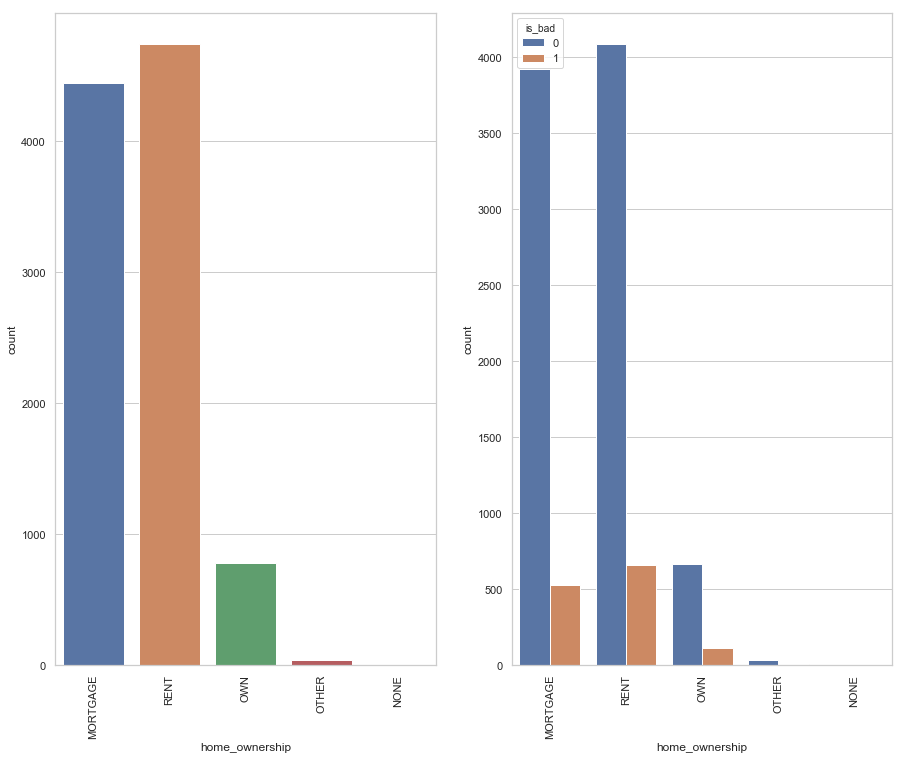

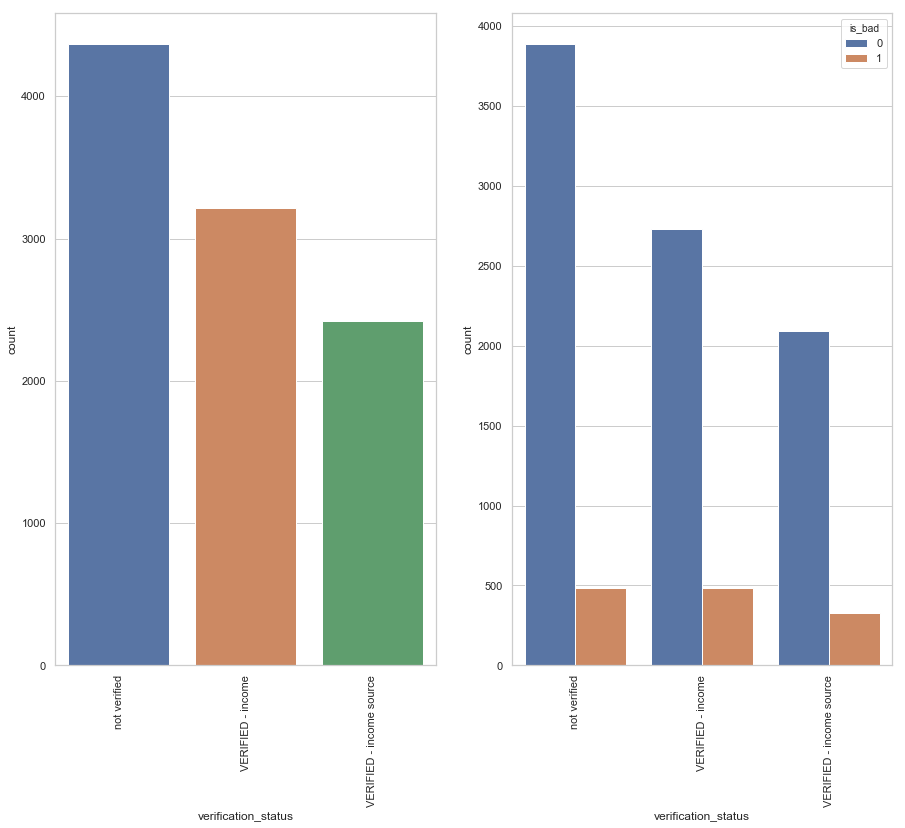

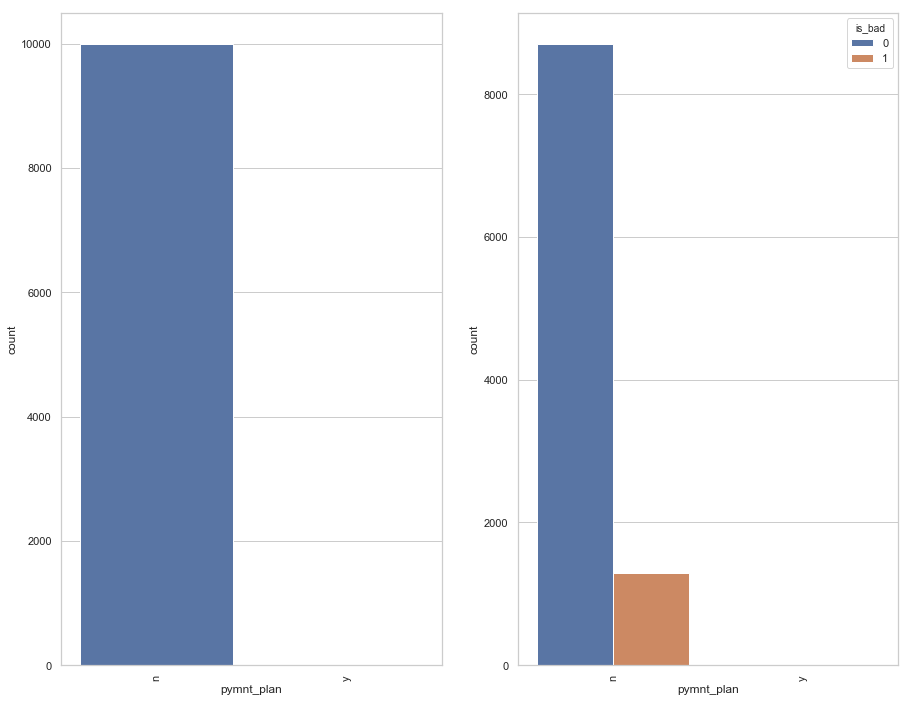

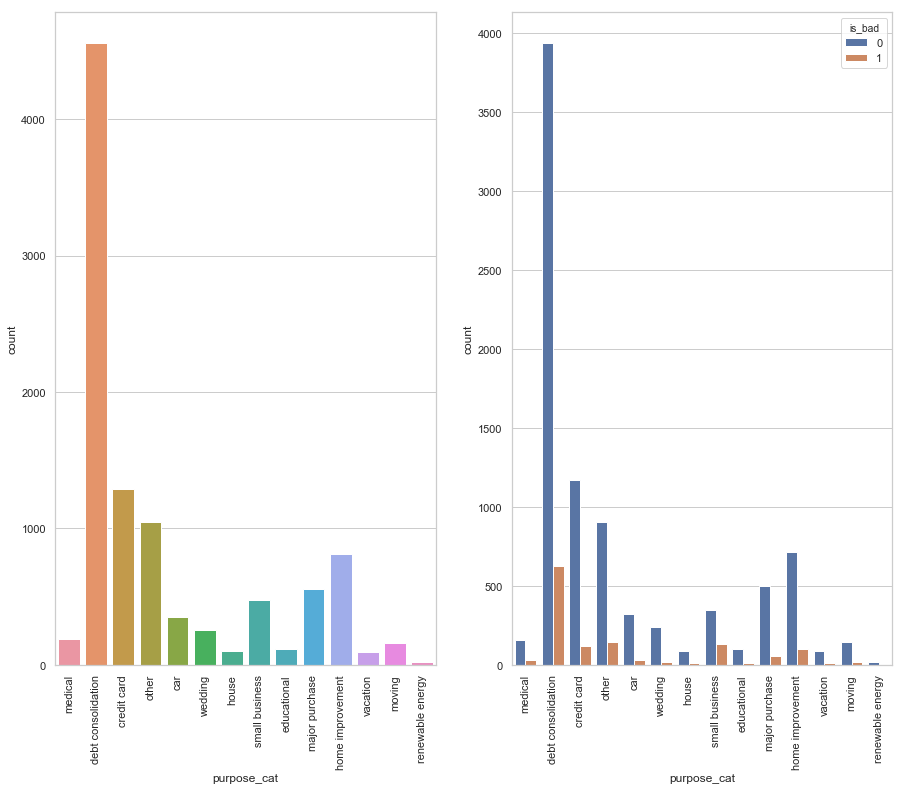

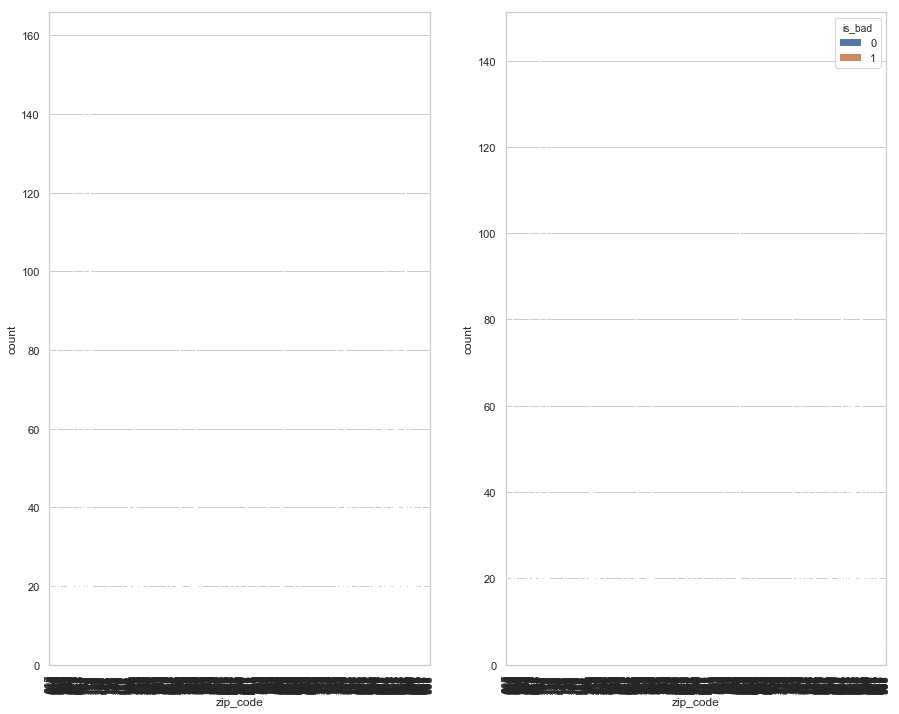

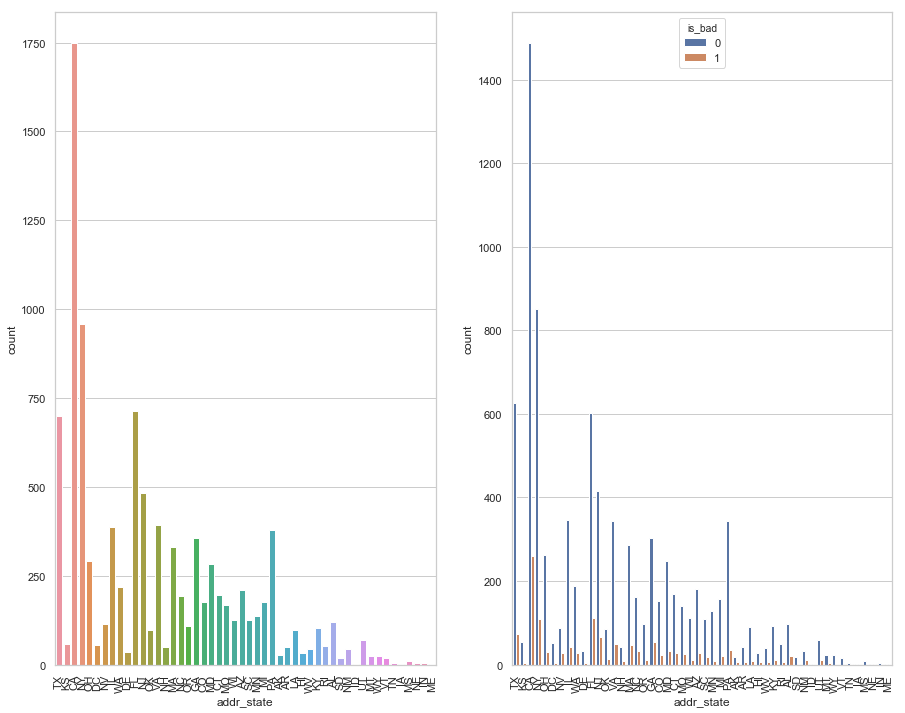

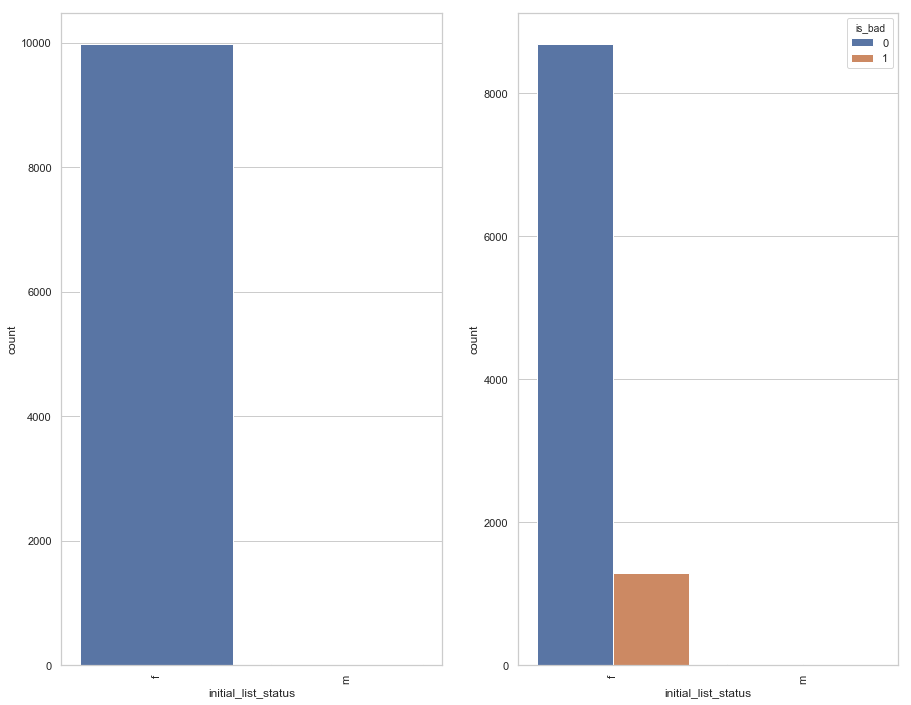

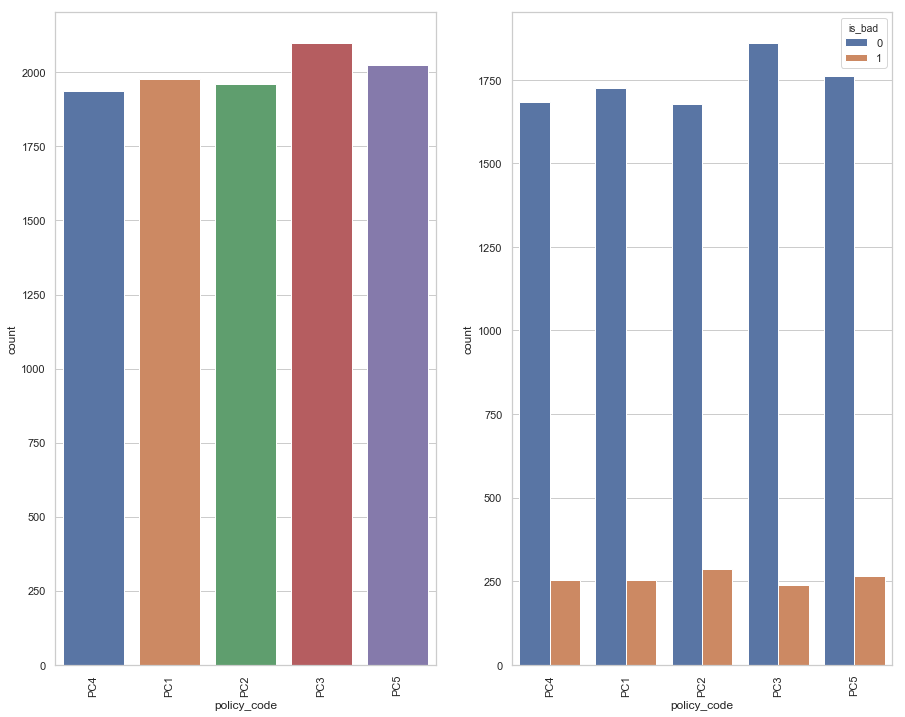

In [130]:
for n in df.columns.values:
    if n=='zip_code':
        df[n] = df[n].apply(trim_zipcode)
        #df[n] = df[n].apply(lambda x: x[:3])
    
    if n=='purpose_cat':
        df[n] = df[n].apply(trim_purpose)
        
    if n in cols_categorical:
        plot_categorical(df, n, cols_y=cols_y[0], file_prefix="cleaned",rotation=90)
        pass
    
    elif n in cols_numeric:
        df[n] = df[n].astype('float')

        try:
            #plot_numeric(df.dropna(), n, cols_y=cols_y[0])
            pass
        except:
            pass
        
       

In [5]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
import numpy as np
le = OneHotEncoder(handle_unknown="ignore")

d1=np.array(["paris", "paris", "tokyo", "amsterdam"])
d2=np.array(["tokyo", "tokyo", "paris"])
d3=np.array(["tokyo", "tokyo", "paris",'tehran'])

d1 = d1.reshape(-1, 1)
d2 = d2.reshape(-1, 1)
d3 = d3.reshape(-1, 1)
le.fit(d1)

try:
    print(list(le.classes_))
except:    
    print(list(le.categories_))

print("INV")        
# print(list(le.inverse_transform([[2], [2], [1]])))    

print("D2")    
print(le.transform(d2) )    

print("D3")
print(le.transform(d3) )    


[array(['amsterdam', 'paris', 'tokyo'], dtype='<U9')]
INV
D2
  (0, 2)	1.0
  (1, 2)	1.0
  (2, 1)	1.0
D3
  (0, 2)	1.0
  (1, 2)	1.0
  (2, 1)	1.0


In [8]:
dd = le.transform(d3)
dd.